In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import BboxImage
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from os import listdir
from os.path import isfile, join

In [2]:
shooting_df = pd.read_csv('contested_shooting_data.csv', index_col=0)
shooting_df['C FG3A']= shooting_df['C FG3A'].astype(float)
shooting_df['C FG3%']= shooting_df['C FG3%'].astype(float)
shooting_df['O FG3%']= shooting_df['O FG3%'].astype(float)

In [3]:
filt_shooting_df = pd.read_csv('filtered_contested_shooting_data.csv', index_col=0)
filt_shooting_df['C FG3A']= filt_shooting_df['C FG3A'].astype(float)
filt_shooting_df['C FG3%']= filt_shooting_df['C FG3%'].astype(float)
filt_shooting_df['O FG3%']= filt_shooting_df['O FG3%'].astype(float)

In [4]:
onlyfiles = [f for f in listdir('headshots/') if isfile(join('headshots/', f))]

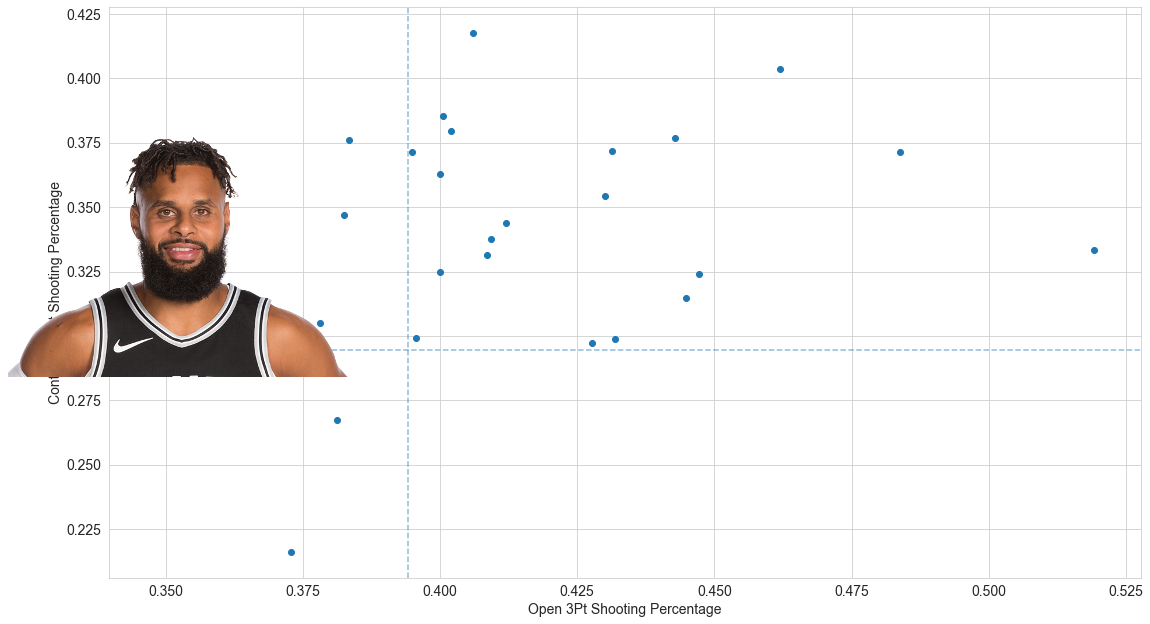

In [148]:
def getImage(path):
    return OffsetImage(plt.imread(path))

sns.set_style("whitegrid")
x = filt_shooting_df['C FG3%'].to_numpy().tolist() #contested
y = filt_shooting_df['O FG3%'].to_numpy().tolist() #open


fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.scatter(y, x);
ax.axhline(0.294513523624833, ls = '--', alpha = 0.5)
ax.axvline(0.39410248685329824, ls = '--', alpha = 0.5)
plt.xlabel('Open 3Pt Shooting Percentage')
plt.ylabel('Contested 3Pt Shooting Percentage')


#for y0, x0, path in zip(y, x, onlyfiles):
ab = AnnotationBbox(getImage('headshots/' + onlyfiles[20]), (y[0], x[0]), frameon=False);
ab.set_fontsize(2)
ax.add_artist(ab)

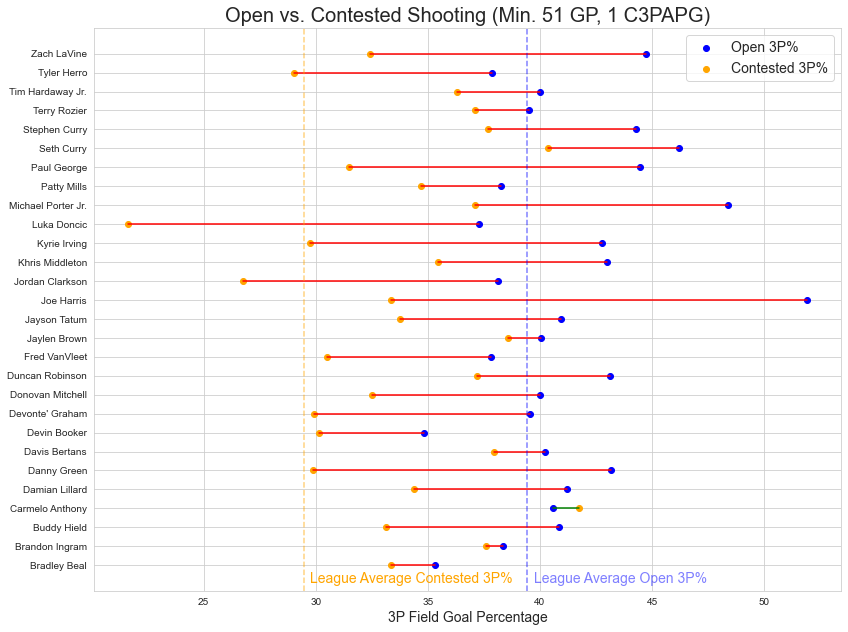

In [4]:
sns.set_style("whitegrid")
x = filt_shooting_df['C FG3%'].to_numpy().tolist() #contested
y = filt_shooting_df['O FG3%'].to_numpy().tolist() #open
x = [item * 100 for item in x]
y = [item * 100 for item in y]
z = list(range(1, 29))

fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
ax.scatter(y, z, c='blue', label = 'Open 3P%');
ax.scatter(x, z, c='orange', label = 'Contested 3P%');
for i in range(0,28):
    if x[i] > y[i]:
        ax.plot([x[i], y[i]], [i+1, i+1], c='green')
    else:
        ax.plot([x[i], y[i]], [i+1, i+1], c='red')


plt.yticks(z, labels = filt_shooting_df.index.values);
plt.rcParams.update({'font.size': 14})
plt.title('Open vs. Contested Shooting (Min. 51 GP, 1 C3PAPG)', size = '20');
ax.axvline(29.4513523624833, ls = '--', alpha = 0.5, c='orange');
ax.axvline(39.410248685329824, ls = '--', alpha = 0.5, c='blue');
plt.xlabel('3P Field Goal Percentage', size = '14')
plt.text(29.75, 0.3, 'League Average Contested 3P%', va = 'center', c = 'orange')
plt.text(39.75, 0.3, 'League Average Open 3P%', va = 'center', c = 'blue', alpha = 0.5)
plt.legend();
plt.tight_layout()
plt.savefig('contested_shooting.png', dpi = 400)
#plt.ylabel('Contested 3Pt Shooting Percentage')

SyntaxError: invalid syntax (<ipython-input-44-a7676268e132>, line 1)